In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib




In [3]:
df2 = pd.read_csv("D:/luminar_task/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df2.shape

(7043, 21)

In [5]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df2.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
df2.value_counts()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
0002-ORFBO  Female  0              Yes      Yes         9       Yes           No                DSL              No                   Yes                  No                   Yes                  Yes                  No                   One year        Yes               Mailed check               65.60           593.3         No       1
6616-AALSR  Female  0              Yes      Yes         65      Yes           Yes               Fiber optic      Yes                  No                   Yes                  No                   Yes                  Yes                  Two year        Yes               Credit card (automatic)    104.30          6725.3 

In [8]:
df2['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
df2['gender']

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object

In [10]:
df2.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<Axes: xlabel='Churn', ylabel='count'>

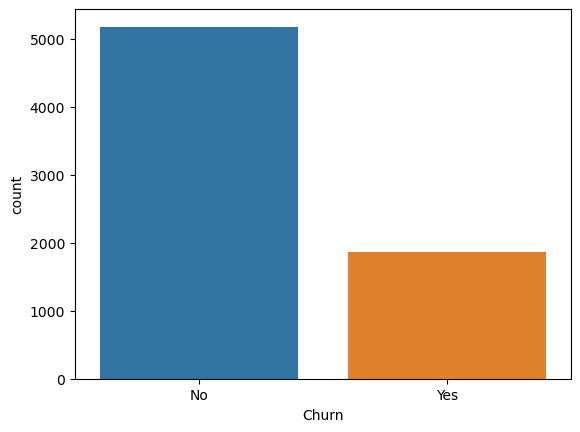

In [11]:
sns.countplot(x='Churn',data=df2)

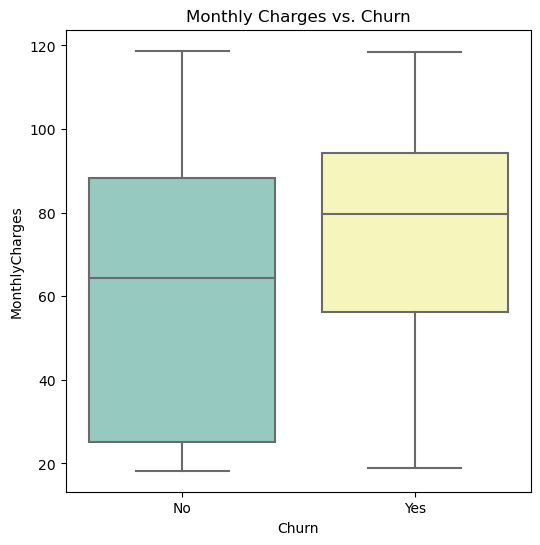

In [12]:
# Monthly Charges vs. Churn
plt.figure(figsize=(6, 6))
sns.boxplot(data=df2, x='Churn', y='MonthlyCharges', palette='Set3')
plt.title('Monthly Charges vs. Churn')
plt.show()


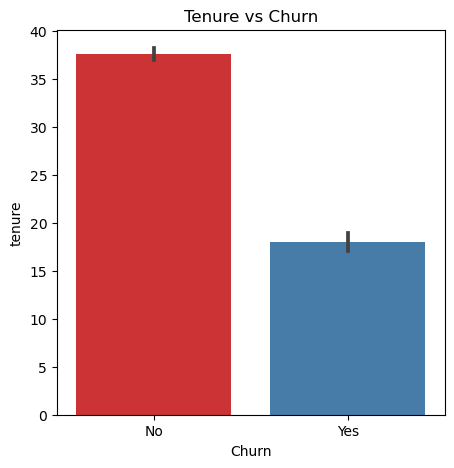

In [13]:

plt.figure(figsize=(5, 5))
sns.barplot(data=df2, x='Churn', y='tenure', palette='Set1')
plt.title('Tenure vs Churn')
plt.show()


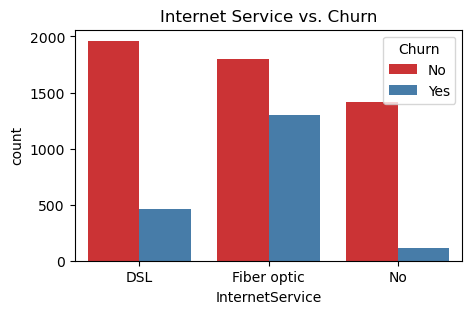

In [14]:
plt.figure(figsize=(5,3))
sns.countplot(data=df2, x='InternetService', hue='Churn', palette='Set1')
plt.title('Internet Service vs. Churn')
plt.show()


<Axes: ylabel='Frequency'>

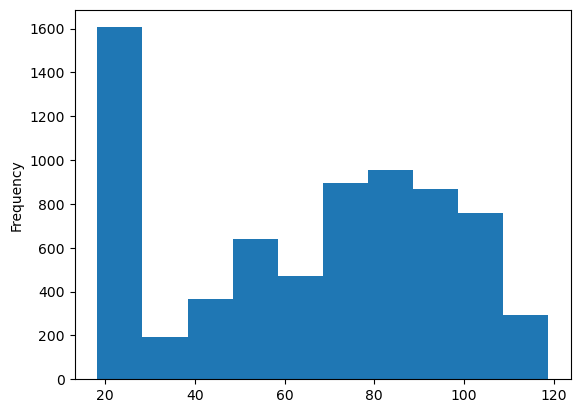

In [15]:
df2.MonthlyCharges.plot.hist()

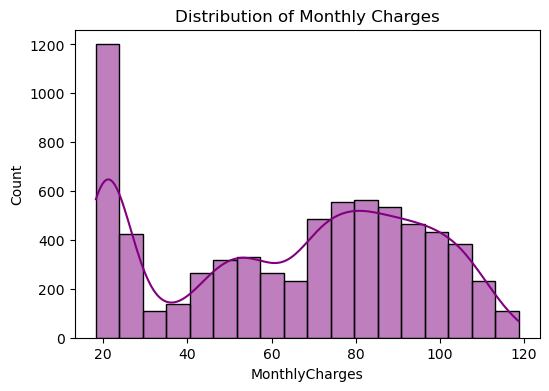

In [16]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df2, x='MonthlyCharges', kde=True, color='purple')
plt.title('Distribution of Monthly Charges')
plt.show()


In [17]:
le =LabelEncoder()
df2['gender']=le.fit_transform(df2['gender'])
df2['Partner']=le.fit_transform(df2['Partner'])
df2['Dependents']=le.fit_transform(df2['Dependents'])
df2['PhoneService']=le.fit_transform(df2['PhoneService'])
df2['MultipleLines']=le.fit_transform(df2['MultipleLines'])
df2['InternetService']=le.fit_transform(df2['InternetService'])
df2['OnlineBackup']=le.fit_transform(df2['OnlineBackup'])
df2['OnlineSecurity']=le.fit_transform(df2['OnlineSecurity'])
df2['DeviceProtection']=le.fit_transform(df2['DeviceProtection'])
df2['TechSupport']=le.fit_transform(df2['TechSupport'])
df2['StreamingMovies']=le.fit_transform(df2['StreamingMovies'])
df2['StreamingTV']=le.fit_transform(df2['StreamingTV'])
df2['Contract']=le.fit_transform(df2['Contract'])
df2['PaperlessBilling']=le.fit_transform(df2['PaperlessBilling'])
df2['PaymentMethod']=le.fit_transform(df2['PaymentMethod'])
df2['Churn']=le.fit_transform(df2['Churn'])


In [18]:
df2.head(13)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,820.5,1
6,1452-KIOVK,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1949.4,0
7,6713-OKOMC,0,0,0,0,10,0,1,0,2,...,0,0,0,0,0,0,3,29.75,301.9,0
8,7892-POOKP,0,0,1,0,28,1,2,1,0,...,2,2,2,2,0,1,2,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,0,0,2,...,0,0,0,0,1,0,0,56.15,3487.95,0


In [19]:
print(df2[['tenure', 'MonthlyCharges', 'TotalCharges']].isnull().sum())


tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64


In [20]:
scalar = StandardScaler()
df2[['tenure','MonthlyCharges']] = scalar.fit_transform(df2[['tenure','MonthlyCharges']])

In [21]:
df2=df2.drop(['customerID','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaymentMethod','TotalCharges'],axis=1)


In [22]:
print(df2.isnull().sum())

gender              0
SeniorCitizen       0
tenure              0
MultipleLines       0
InternetService     0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64


In [24]:

X = df2.drop('Churn', axis=1)
y = df2['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
print(X_train.isnull().sum())


gender              0
SeniorCitizen       0
tenure              0
MultipleLines       0
InternetService     0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
dtype: int64


In [26]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [28]:
y_prob = model.predict_proba(X_test)[:, 1]
y_prob

array([0.66, 0.03, 0.01, ..., 0.01, 0.  , 0.93])

In [29]:
accuracy_score(y_test,y_pred)

0.7806955287437899

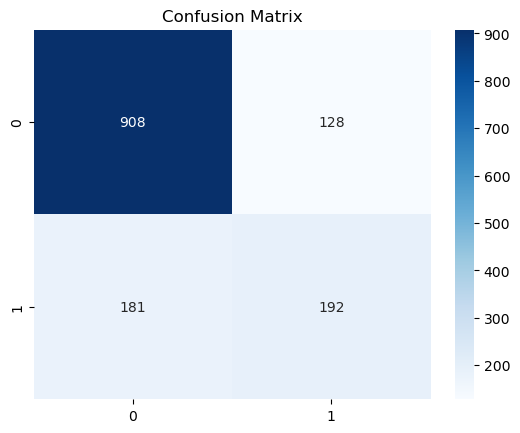

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1036
           1       0.60      0.51      0.55       373

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.70      1409
weighted avg       0.77      0.78      0.78      1409



In [32]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [33]:
print(pd.Series(y).value_counts())

0    5174
1    5174
Name: Churn, dtype: int64


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print(X_train.isnull().sum())

gender              0
SeniorCitizen       0
tenure              0
MultipleLines       0
InternetService     0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
dtype: int64


In [36]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [37]:
accuracy_score(y_test,y_pred)

0.8222222222222222

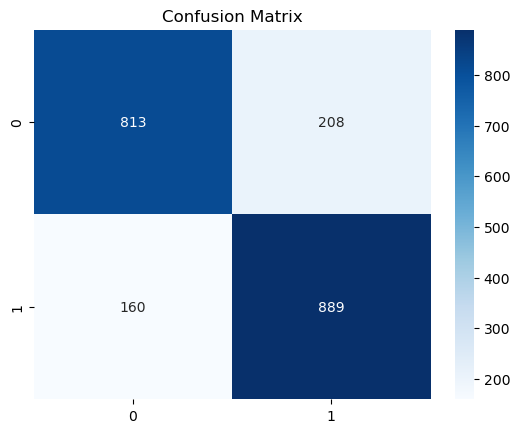

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1021
           1       0.81      0.85      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



In [40]:

joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']